<a href="https://colab.research.google.com/github/Maira-Nurul/Campaign-and-Transaction-Analysis-for-a-Leading-Payement-Gateway-in-Indonesia/blob/main/PBL_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Start**

In [ ]:
#Menghubungkan gdrive dengan google colab
from google.colab import drive
drive.mount('/content/drive')

#Mengimport file transaction
import pandas as pd
transaction = pd.read_csv('/content/drive/MyDrive/College/Semester 7/Studpen/master_trx_campaign_cleaned.csv')
transaction.head()

#Mengimport file campaign
import pandas as pd
campaign= pd.read_csv('/content/drive/MyDrive/College/Semester 7/Studpen/master_campaign_cleaned.csv')
campaign.head()

import matplotlib.pyplot as plt
import seaborn as sns


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Visualization**

### **1. Customer and revenue distribution based on age**

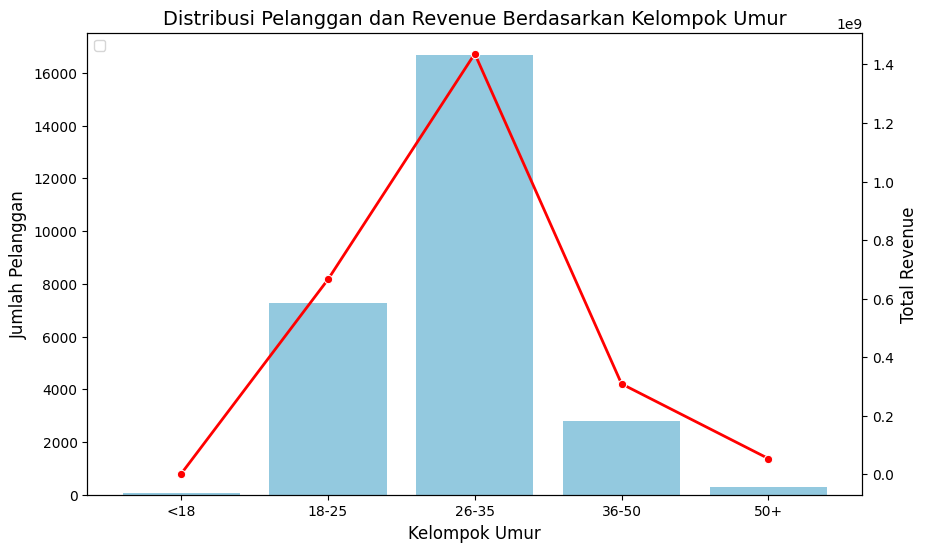

In [ ]:
#Membuat Kelompok Umur
transaction['age_group'] = pd.cut(
    transaction['cust_age'],
    bins=[0, 18, 25, 35, 50, 100],  # Rentang kelompok umur
    labels=["<18", "18-25", "26-35", "36-50", "50+"]  # Label untuk setiap kelompok
)
# Agregasi data: hitung jumlah pelanggan dan total revenue untuk setiap kelompok umur
age_summary = transaction.groupby('age_group', observed=False).agg(
    customer_count=('cust_age', 'count'),  # Jumlah pelanggan
    total_revenue=('paid_amount', 'sum')  # Total revenue
).reset_index()

# Visualisasi: Bar plot untuk distribusi pelanggan dan line chart untuk revenue
fig, ax1 = plt.subplots(figsize=(10, 6))
# Bar plot untuk distribusi pelanggan berdasarkan kelompok umur
sns.barplot(
    data=age_summary,
    x='age_group',
    y='customer_count',
    color='skyblue',
    ax=ax1
)
ax1.set_ylabel('Jumlah Pelanggan', fontsize=12)
ax1.set_xlabel('Kelompok Umur', fontsize=12)
ax1.set_title('Distribusi Pelanggan dan Revenue Berdasarkan Kelompok Umur', fontsize=14)
# Line chart untuk total revenue
ax2 = ax1.twinx()  # Membuat axis kedua untuk line chart
sns.lineplot(
    data=age_summary,
    x='age_group',
    y='total_revenue',
    color='red',
    marker='o',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel('Total Revenue', fontsize=12)
# Menambahkan legenda
lines, labels = ax2.get_legend_handles_labels()
ax2.legend(lines, ['Total Revenue'], loc='upper left')
plt.show()

### **2.  Merchants Category based on Transaction Count**

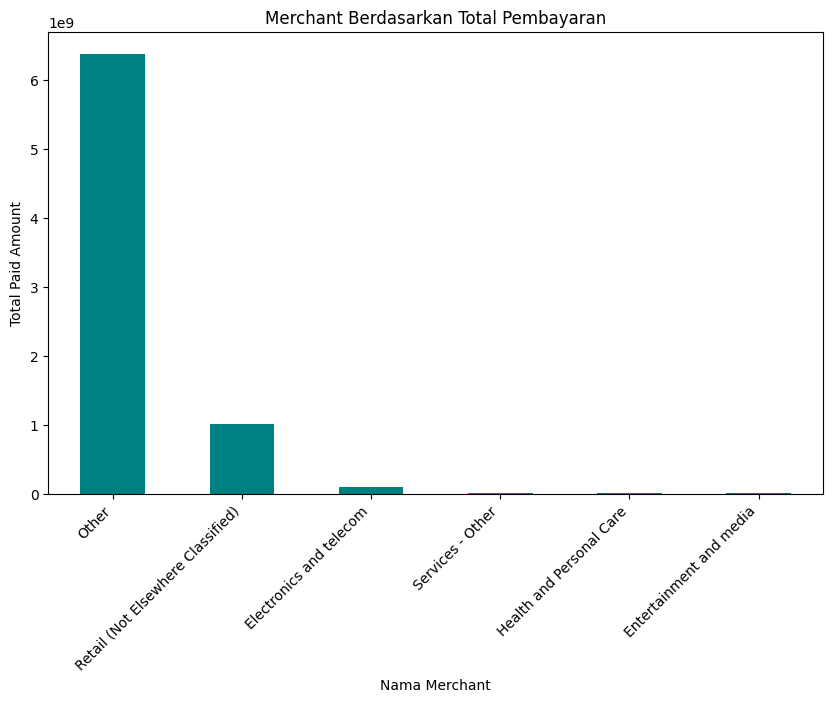

In [ ]:
merchant_performance = transaction.groupby('merchant_category_name')['paid_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
merchant_performance.plot(kind='bar', color='teal')
plt.title("Merchant Berdasarkan Total Pembayaran")
plt.xlabel("Nama Merchant")
plt.ylabel("Total Paid Amount")
plt.xticks(rotation=45, ha='right')
plt.show()


### **3.  Campaign Code Ratio by Campaign Duration**

In [ ]:
campaign.head()

,Campaign_ID,Campaign_Name,Campaign_Code,Code_Used,Code_Quota,Campaign_Start_Date,Campaign_End_Date,Promo_Duration
0,854,Saatnya Ragnarok,ROODOKUNIPIN,144,1000,2023-06-21,2023-06-30,9
1,825,CEBAN,TAGIHANCEBANFEB2,1488,1500,2023-01-25,2023-02-10,16
2,718,testinhceban,testceban20,0,20,2021-08-25,2021-08-26,1
3,764,TESTCAMPAIGNCEBAN1234,TESTCAMPAIGNCEBAN1234,1,100,2022-01-24,2022-01-25,1
4,740,CEBAN,CEBANGAMESDEC,51,500,2021-11-25,2021-12-10,15


    campaign_duration_days  total_quota  total_used
0                        1          740           1
1                        2         1130           0
2                        4          200           0
3                        5          500         111
4                        7          500         184
5                        8         1000          17
6                        9         4100         449
7                       13         7750        6000
8                       14        10850        6505
9                       15        49750       39081
10                      16        73410       51685
11                      17          500          18
12                      18         3000         178
13                      19          700           0
14                      21          150           0
15                      28         1500         128
16                      30         2550        1015
17                      31         1875        1102
18          

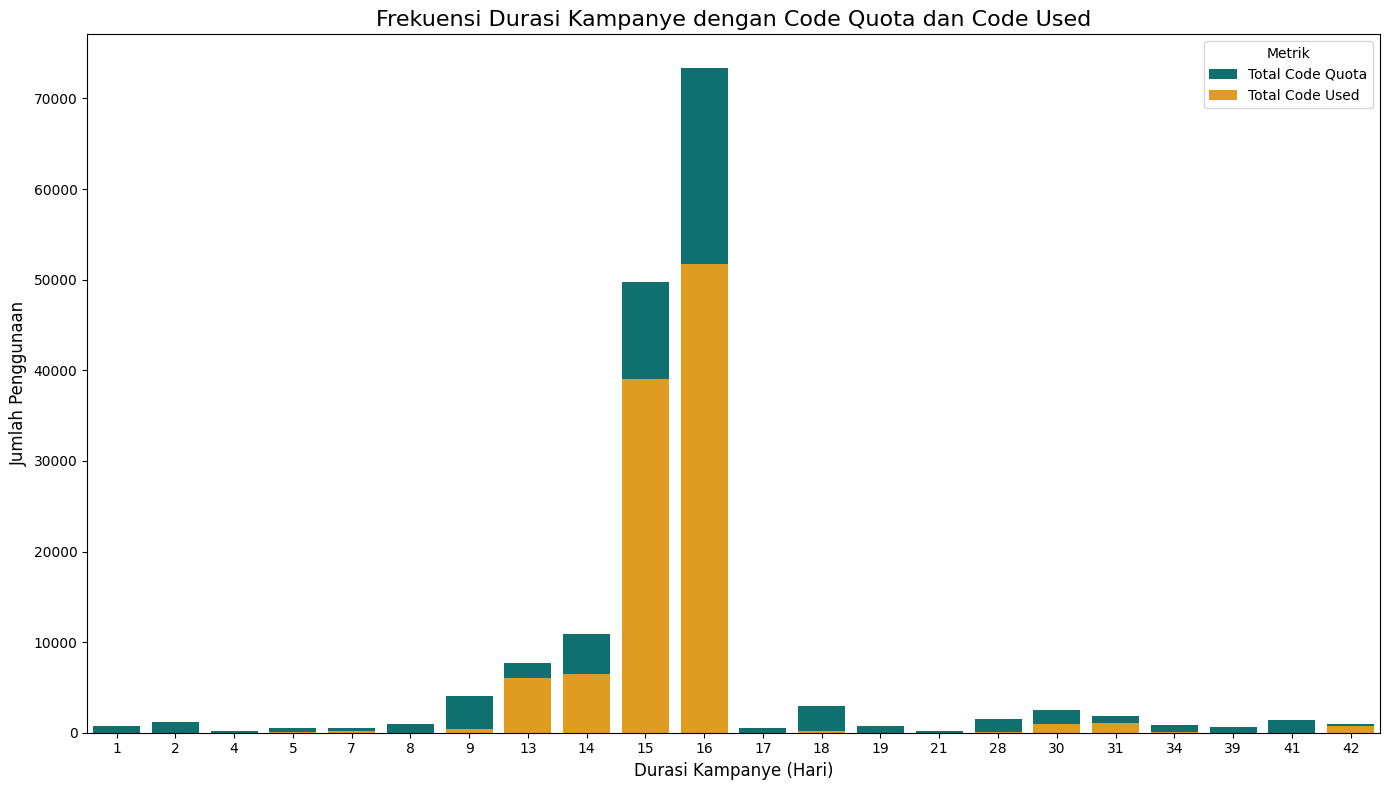

In [ ]:
# Menghitung durasi kampanye dalam hari
campaign['Campaign_End_Date'] = pd.to_datetime(campaign['Campaign_End_Date'])
campaign['Campaign_Start_Date'] = pd.to_datetime(campaign['Campaign_Start_Date'])
campaign['campaign_duration_days'] = (campaign['Campaign_End_Date']-campaign['Campaign_Start_Date']).dt.days

# Menghitung frekuensi penggunaan kuota (Code_Quota) dan kode yang digunakan (Code_Used) berdasarkan durasi kampanye
usage_by_duration = campaign.groupby('campaign_duration_days').agg(
    total_quota=('Code_Quota', 'sum'),
    total_used=('Code_Used', 'sum')
).reset_index()

# Menampilkan frekuensi penggunaan kuota dan kode yang digunakan berdasarkan durasi kampanye
print(usage_by_duration)

# Visualisasi: Kombinasi bar chart untuk frekuensi durasi kampanye, Code Quota dan Code Used
plt.figure(figsize=(14, 8))

# Bar Chart untuk Total Code Quota
sns.barplot(x='campaign_duration_days', y='total_quota', data=usage_by_duration, color='teal', label='Total Code Quota')

# Bar Chart untuk Total Code Used
sns.barplot(x='campaign_duration_days', y='total_used', data=usage_by_duration, color='orange', label='Total Code Used')

# Menambahkan judul dan label
plt.title('Frekuensi Durasi Kampanye dengan Code Quota dan Code Used', fontsize=16)
plt.xlabel('Durasi Kampanye (Hari)', fontsize=12)
plt.ylabel('Jumlah Penggunaan', fontsize=12)
plt.legend(title='Metrik', loc='upper right')

# Menyesuaikan layout dan menampilkan grafik
plt.tight_layout()
plt.show()

### **4.  Promo Code Usage Ratio by Campaign**

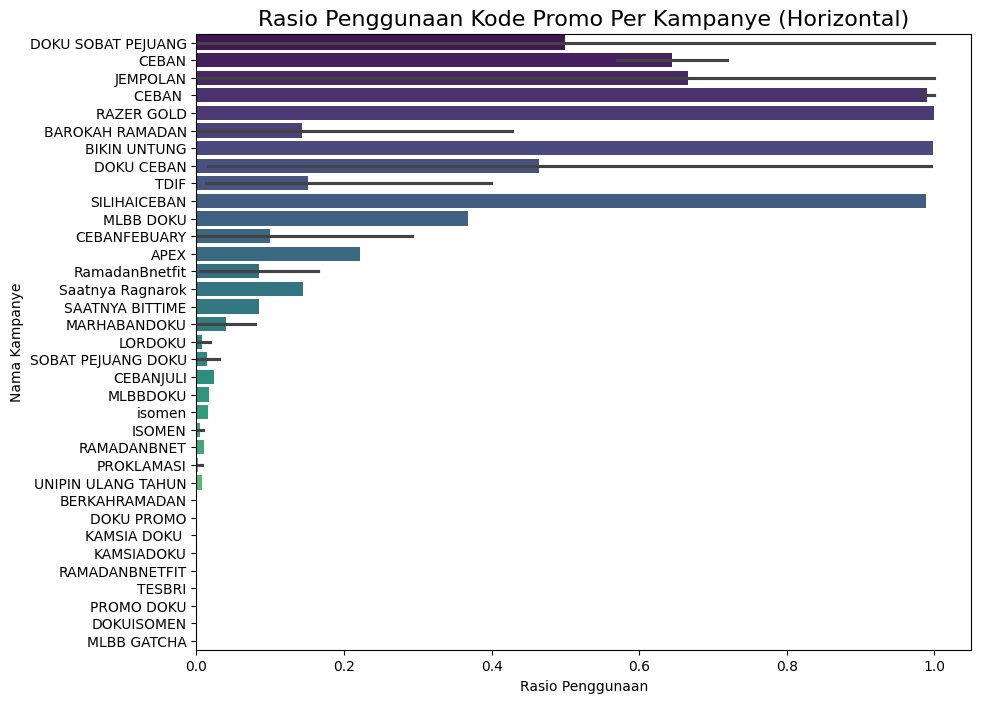

In [ ]:
# Menghitung rasio penggunaan kode promo per kampanye
campaign['promo_used_ratio'] = campaign['Code_Used'] / campaign['Code_Quota']

# Mengurutkan berdasarkan rasio penggunaan
campaign_data_sorted=campaign[['Campaign_Name', 'promo_used_ratio']].sort_values(by='promo_used_ratio', ascending=False)

# Menghapus baris yang memiliki 'Campaign_Name' yang berisi 'test' atau lainnya yang tidak diinginkan
campaign_data_sorted=campaign_data_sorted[~campaign_data_sorted['Campaign_Name'].str.contains('test', case=False)]

# Visualisasi menggunakan horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='promo_used_ratio', y='Campaign_Name', data=campaign_data_sorted, palette="viridis", hue ="Campaign_Name", legend=False)
plt.title('Rasio Penggunaan Kode Promo Per Kampanye (Horizontal)', fontsize=16)
plt.xlabel('Rasio Penggunaan')
plt.ylabel('Nama Kampanye')
plt.show()


### **5.  Top 10 City by Transaction**

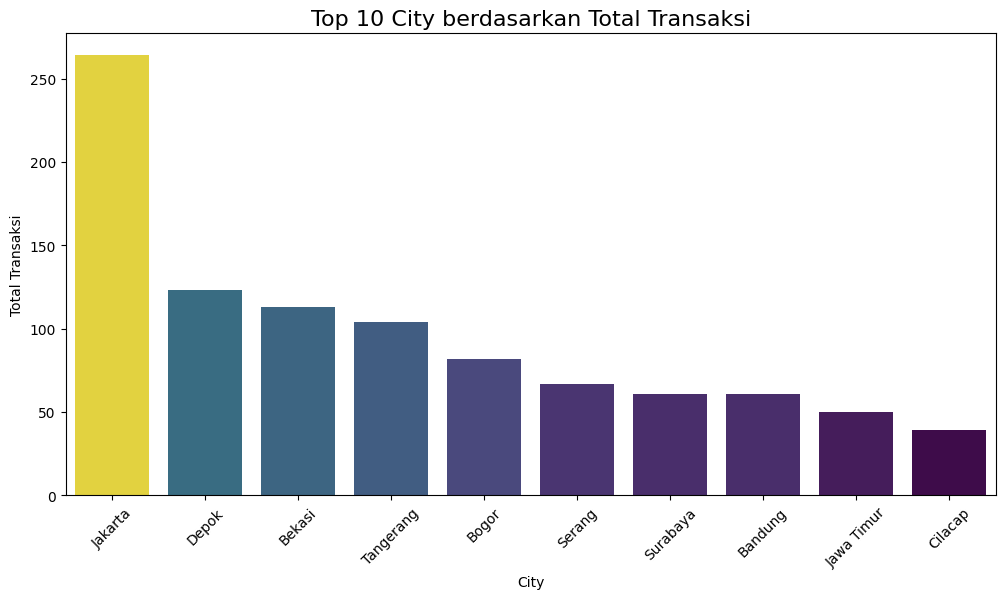

In [ ]:
total_transactions_by_city = (transaction.groupby('city')['tpt'].sum().reset_index().sort_values(by='tpt', ascending=False).head(10))

# Visualisasi dengan bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=total_transactions_by_city,
    x='city',
    y='tpt',
    palette='viridis',
    hue='tpt',
    legend=False)

plt.title('Top 10 City berdasarkan Total Transaksi', fontsize=16)
plt.xlabel('City')
plt.ylabel('Total Transaksi')
plt.xticks(rotation=45)  # Memutar label city agar lebih terbaca
plt.show()
